(dataset)=
# Datensatz 1 (Schraubenköpfe)

Neuronale Netze sind bemerkenswert gut darin, Muster in Daten zu finden, die bei der Vorhersage der Labels der Daten sehr hilfreich sind. Das bedeutet aber auch, dass wir mit den Daten, die wir dem Netz zum Lernen geben, vorsichtig sein müssen; mit jedem Muster in den Daten, das für unsere Aufgabenstellung irrelevant ist, kann das Netz etwas Falsches lernen. Indem wir die Daten in richtiger Weise vorverarbeiten, können wir unserem neuronalen Netz das Lernen der relevanten Muster so einfach wie möglich machen. {cite:p}`Osinga` 

Das Erstellen eigener Datensätze bietet einige Vorteile gegenüber fertigen Datensätzen.
Um z.$~$B. mit einfachen Modellen starten zu können, sollte auch die Lernaufgabe zunächst so einfach wie möglich und so schwierig wie nötig gestaltet sein. Ein eigener Datensatz lässt sich sehr gut auf das Projekt zuschneiden. So ist es einfacher, das Modell besser zu verstehen und nachvollziehen zu können.


Um einfach zu beginnen, konzentrieren wir uns zunächst auf einen Teil der Schraube, dem Kopf bzw. der Antriebsart (Kreuzschlitz, Torx, Sechskant, usw.) und nehmen dafür einfache Grafiken, die sehr gut zu unterscheiden sind, damit sich das Modell nur auf die Form konzentrieren kann und nicht von den Lichteinflüssen der realen Umgebung beeinflusst wird. Die Auswahl fiel auf folgende gängigen Antriebsarten:
- Innensechskant (Inbus)
- Philips (Kreuzschlitz)
- Pozidriv (Kreuzschlitz)
- Sechskant
- Torx (Innensechsrund)

Diese Schrauben Kategorien soll der Datensatz enthalten. Zu jeder Klasse existiert ein Bild. 
Die [Schraubenkopf Bilder](dataset1_bilder) lassen sich gut voneinander unterscheiden, bringen jedoch schon kleinere Hürden für die Erkennung mit sich:
- Innensechskant und Torx ähneln sich, schwarzer Ring auf weißem Hintergrund, Innenkontur auch ähnlich
- Philips-Kreuzschlitz und Pozidriv-Kreuzschlitz sind nur durch die Einkerbungen im Pozidrivkopf zu unterscheiden
- Das Sechskant-Profil lässt sich von allen am deutlichsten unterscheiden

Es ist zu erwarten, dass die Modelle weniger Schwierigkeiten haben werden den Sechskant von anderen zu unterscheiden, als z.$~$B. das Philips-Profil vom Pozidriv-Profil.

So sollte dieser Datensatz einfach genug für den Anfang sein, aber bringt auch schon die ersten Schwierigkeiten mit sich, welche die Performance der verschiedenen Modelle auf die Probe stellen.

Da die Modelle mit vielen verschiedenen Bildern je Kategorie trainiert werden sollen, wird mit Hilfe des Image Data Generator aus dem Tensorflow Paket ein künstlicher Datensatz erzeugt.
Der Image Data Generator, ist in der Lage vorhandene Bilder zu transformieren (shift, rotate, roll, usw.). Somit kann ein Trainingsdatensatz künstlich vergrößert werden ([Datensatz aus wenigen Bildern](dataset1)).

(dataset1_bilder)=
## Bilder anzeigen

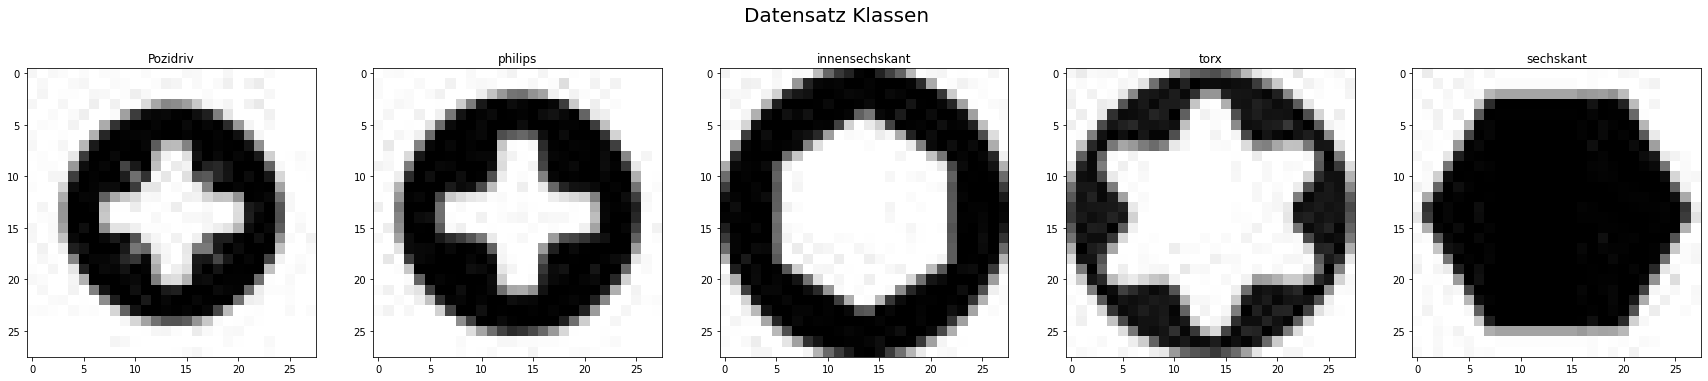

In [3]:
# importieren der Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


pozidriv = mpimg.imread('0_Schraubenkopfbilder_28x28/pozidriv/pozidriv 28x28_gray.jpg')
philips = mpimg.imread('0_Schraubenkopfbilder_28x28/philips/philips 28x28_gray.jpg')
innensechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/innensechskant/innensechskant 28x28_gray.jpg')
sechskant = mpimg.imread('0_Schraubenkopfbilder_28x28/sechskant/sechskant 28x28_gray.jpg')
torx = mpimg.imread('0_Schraubenkopfbilder_28x28/torx/torx 28x28_gray.jpg')


plt.figure(figsize=(30, 6))
plt.subplot(1, 5, 1)
plt.title('Pozidriv')
plt.imshow(pozidriv, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('philips')
plt.imshow(philips, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('innensechskant')
plt.imshow(innensechskant, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('torx')
plt.imshow(torx, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('sechskant')
plt.imshow(sechskant, cmap='gray')

plt.suptitle('Datensatz Klassen', fontsize=20)
#plt.subplots_adjust(left=0.2, wspace=0.4, top=0.8)
plt.show()

Aus diesen fünf gängigen Schrauben-Mitnahmeprofilen wird nun ein Datensatz erzeugt.


(dataset1)=
## Datensatz aus wenigen Bildern

Dieser erste Datensatz dient dazu, zu zeigen wie vorhandene Bilder künstlich leichten Veränderungen unterzogen werden können, um somit dem Modell einen umfangreicheren Trainingssatz bereitzustellen. Des Weiteren werden in diesem künstlichen Datensatz lediglich verschiedene Schraubenkopfformen mit gleicher Ausrichtung verwendet. 

Als Einführung in das Thema Bilderkennung mit neuronalen Netzen wird eine einfache Bilderkennung mit Hilfe der logistischen Regression erstellt. Die logistische Regression ist sehr viel weniger leistungsfähig als ein KNN, bietet sich durch die Einfachheit aber als Einstieg in das Thema der KNNs an.

## Image Data Generator (Konfiguration)

Die fünf Bilder werden mit Hilfe des "Image Data Generators" transformiert, d.$~$h durch Rotation, Zoom, Verschiebung werden weitere Varianten der Bilder generiert.

```{toggle}
Die wichtigsten Augmentationstechniken:

**1. Random Rotations**  

Die Bildrotation ist eine weit verbreitete Augmentationstechnik und ermöglicht es dem Modell, gegenüber der Ausrichtung des Objekts toleranter zu werden.
Mit der ImageDataGenerator-Klasse können Bilder zufällig um einen beliebigen Winkel (zwischen 0 und 360 Grad) gedreht werden, indem ein ganzzahliger Wert im rotation_range-Argument angegeben wird.  

Wenn das Bild gedreht wird, bewegen sich einige Pixel aus dem Bild heraus und hinterlassen einen leeren Bereich, der ausgefüllt werden muss.
Die Füllung kann auf verschiedene Arten geschehen, z.$~$B. mit einem konstanten Wert oder den nächstgelegenen Pixelwerten.  

Dies wird im Argument fill_mode angegeben und der Standardwert ist „nearest“, wodurch einfach der leere Bereich  durch Pixelwerte in der näheren Umgebung ersetzt wird.

**2. Random Shifts**  

Es kann vorkommen, dass sich das Objekt nicht immer in der Mitte des Bildes befindet.
Um das Modell darauf vorzubereiten, können die Pixel des Bildes entweder horizontal oder vertikal verschoben werden.  

Mit den Argumenten *height_shift_range* und *width_shift_range* kann eine vertikale bzw. horizontale Bildverschiebung durchgeführt werden.
Wenn der Wert eine Gleitkommazahl ist, würde dies den Prozentsatz der Breite oder Höhe des zu verschiebenden Bildes angeben.
Andernfalls, wenn es sich um einen ganzzahligen Wert handelt, wird einfach die Breite oder Höhe um die jeweilige Anzahl von Pixelwerten verschoben.

**3. Random Flips**

Das Spiegeln von Bildern ist auch eine großartige Augmentationstechnik und es ist sinnvoll, sie mit vielen verschiedenen Objekten zu verwenden.
Die Parameter *horizontal_flip* und *vertical_flip* werden zum Spiegeln entlang der vertikalen oder horizontalen Achse verwendet.
Diese Technik sollte jedoch dem Objekt im Bild entsprechen.
Zum Beispiel wäre das vertikale Umdrehen eines Autos keine sinnvolle Sache im Vergleich zu einem symmetrischen Objekt wie einer Schraube.

**4. Random Brightness**

Da das Objekt unter realen Bedingungen die meiste Zeit nicht unter perfekten Lichtbedingungen steht, ist es auch sehr nützlich, die Helligkeit der Trainingsbilder zufällig zu ändern. So kann das Modell auf Bildern unter verschiedenen Lichtbedingungen trainiert werden.

Die Helligkeit kann über das *Brightness_range*-Argument gesteuert werden.
Es akzeptiert eine Liste mit zwei Float-Werten und wählt einen Helligkeitsverschiebungswert aus diesem Bereich aus. 

**5. Random Zoom**

- Diese Methode zoomt das Bild nach dem Zufallsprinzip mit dem Argument *Zoom_range*.

- Wird beispielsweise [0.5, 1.5] eingegeben bedeutet das eine Vergrößerung um 50 % und Verkleinerung um 150 %.

- Wird [0.6,0.6] eingegeben, wird das Bild in dem Bereich 0 bis 60 % vergrößert. Wenn der Wert größer als 1,0 ist, z.$~$B. [1.6, 1.6] dann zoomt das Bild um 60 % heraus und wird kleiner.
```

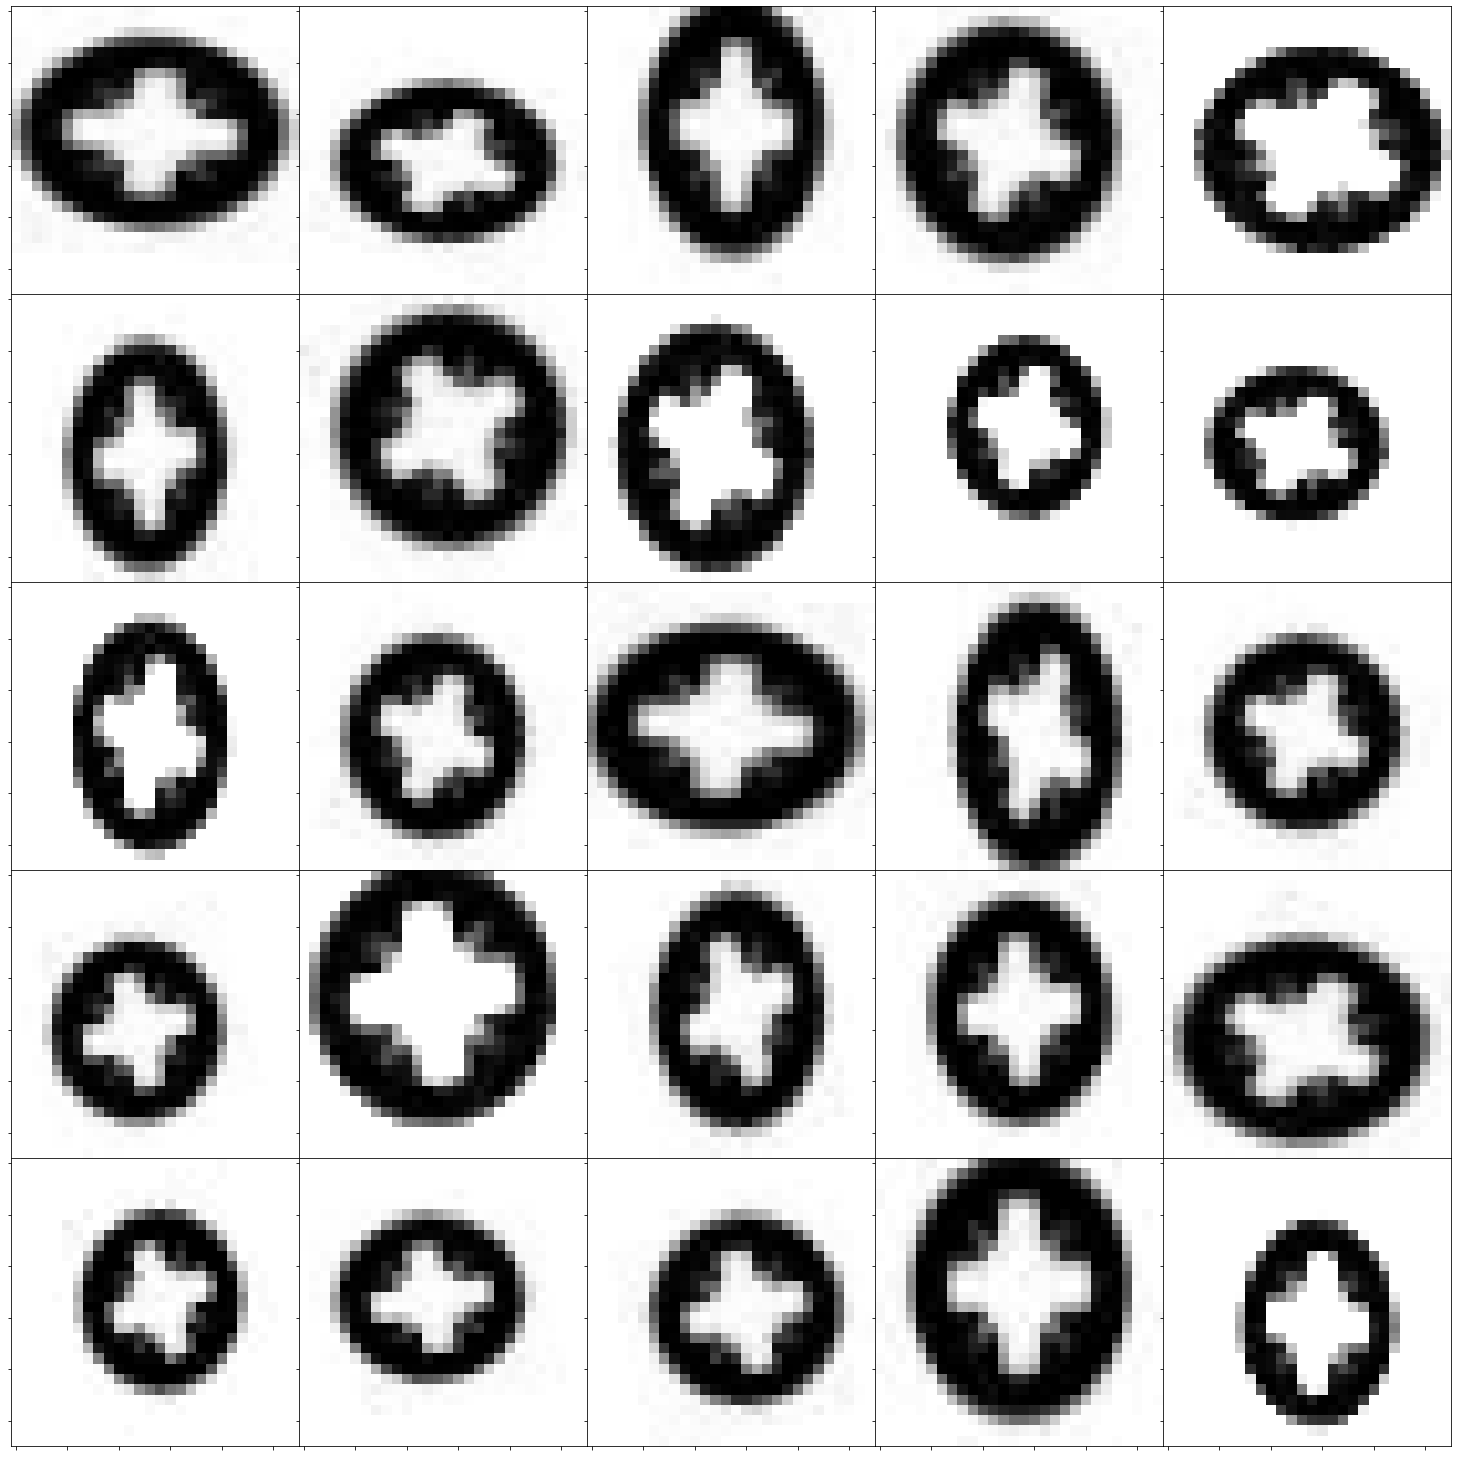

In [8]:
from matplotlib import gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Bild laden
img = pozidriv.reshape(1,28,28,1)





# brightness_range=(0.2, 0.8): 0 = min, 1 = max 
# fill_mode='constant',cval=255,
# width_shift_range=2.0,
# height_shift_range=2.0,
# shear_range=0.0,
# zoom_range=0.20,

# ImageDataGenerator konfigurieren
datagen = ImageDataGenerator(rotation_range=30,
                             brightness_range=[0.1,1.9],
                             fill_mode='constant',cval=255,
                             width_shift_range=2.0,
                             height_shift_range=2.0,
                             shear_range=0.0,
                             zoom_range=[0.8,1.4],
                             channel_shift_range=0.0,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.0,)



# Plot konfiguration
nrow = 5
ncol = 5


#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24)) 
gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 
im = 0
aug_iter = datagen.flow(img, batch_size=1)

# plot 5x5 Bilder
for i in range(nrow):
    for j in range(ncol):
        # Iteration über Generator mit plot der Bilder
        image = next(aug_iter)[0].astype('uint8')
        ax= plt.subplot(gs[i,j])
        ax.imshow(image,cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

Die generierten Pozidriv-Bilder lassen sich teilweise kaum noch vom Philips-Profil unterscheiden. Es wird sich zeigen, ob die Modelle diese noch korrekt identifizieren können.

## Image Data Generator (Speichern)

Ist das Ergebnis der generierten Bilder zufriedenstellend, können mit dem konfigurierten Generator die Bilder klassenweise erzeugt und gespeichert werden. Die Klassen können somit individuell transformiert werden.

````
# Bild laden
image = sechskant.reshape(1,28,28,1)



# iterate

itr = datagen.flow(
    image,
    shuffle=True,
    save_to_dir='dataset_28x28/sechskant',
    save_prefix='sechskant',
    save_format='png',
    
)

# Samples in Ordner schreiben
for i in range(0,2000):
    itr.next()
````

## Labels erzeugen

Die künstlich erzeugten Bilder wurden in folgende Ordnerstruktur abgelegt:  


main_directory/  
...category_a/  
......a_image_1.jpg  
......a_image_2.jpg  
...category_b/  
......b_image_1.jpg  
......b_image_2.jpg  

Diese Ordnerstruktur, zählt als Standard und kann beliebig, um weitere Klassen ergänzt werden. Nun wird aus dieser Ordnerstruktur ein Datensatz (image_dataset) mit Labels erzeugt. Die Labels entsprechen den Ordnernamen (category_a).

$~$

````
# Ziel ist es, alle generierten Bilder in der angelegten Ordnerstruktur, mit zugehörigen Labels in eine Liste 'training_data' abzulegen

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# Liste anlegen
image_dataset = []

# Bildgröße
IMG_SIZE=28

# rel. Pfad Datensatz Hauptordner
DATADIR = 'dataset_28x28'

# Klassen / Unterordner
CATEGORIES = ['innensechskant', 'philips', 'pozidriv', 'sechskant', 'torx']


# Bilder und Kategorien in ein ... speichern:

def create_image_dataset():
    for category in CATEGORIES:  # jede Klasse

        path = os.path.join(DATADIR,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification ( 0= 1=

        for img in tqdm(os.listdir(path)):  # iterate over each image per Category
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                image_dataset.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_image_dataset()

print(len(image_dataset))
````

Der Datensatz wurde nun erzeugt und in eine Liste gespeichert. Diese Liste enthält die Arrays mit den Bildern und den zugehörigen Labels.  

Für die weitere Verwendung mit verschiedenen Modellen ist es notwendig, die Bilder in ein einzelnes Array (**X**) zu speichern und die Labels in eine separate Liste (**y**):

````
X = []
y = []

for features,label in image_dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
````

## Datensatz mischen

Der Datensatz wird gemischt, um anschließend eine Aufteilung in Trainings- und Testdaten vorzunehmen: 

````python
from sklearn.utils import shuffle
import numpy as np


X, y = shuffle(X, y)
````

## Datensatz aufteilen

Die Bilder **X** und die entsprechenden Labels **y** werden nun noch aufgeteilt.

````python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
````

## Datensatz Vorschau

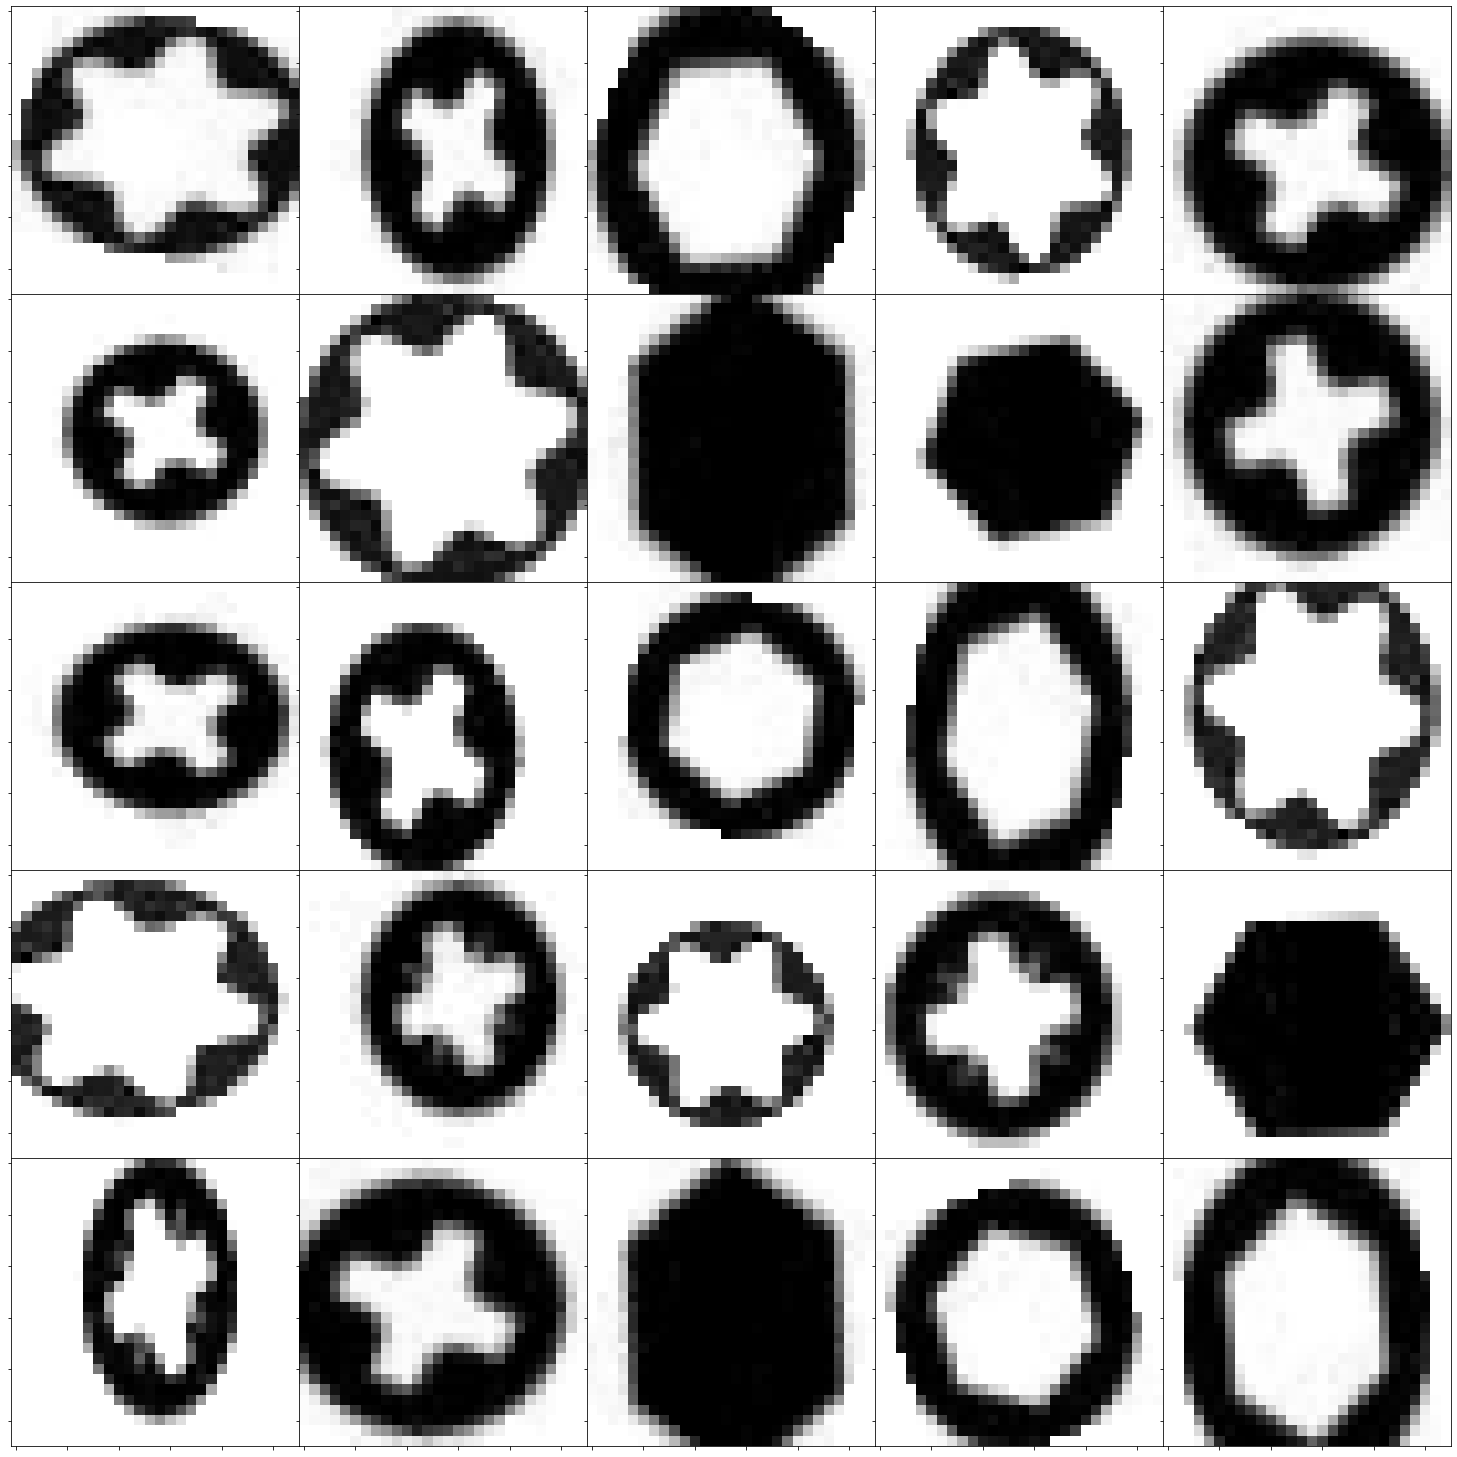

In [19]:
nrow = 5
ncol = 5



#fig = plt.figure(figsize=(ncol+1, nrow+1)) 
fig = plt.figure(figsize=(24, 24))

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1))

im = 0
for i in range(nrow):
    for j in range(ncol):
        # convert to unsigned integers
        
        ax= plt.subplot(gs[i,j])
        ax.imshow(X_train[im,:,:,0].astype('uint8'),cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        im +=1

plt.show()

## Datensatz untersuchen

Bevor der Datensatz exportiert wird, sollte er nochmal auf Inhalt und Format geprüft werden:

In [15]:
print(X_train.shape)
print(X_test.shape)
print("Anzahl Trainingsbilder: " + str(len(y_train)))
print("Anzahl Testbilder: " + str(len(y_test)))

(6421, 28, 28, 1)
(2753, 28, 28, 1)
Anzahl Trainingsbilder: 6421
Anzahl Testbilder: 2753


Kategorie: 1


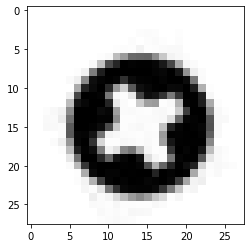

In [16]:
# Label Check

# Schraubenkategorien:

# 0 = innensechskant
# 1 = philips
# 2 = pozidriv
# 3 = sechskant
# 4 = torx

i=2348

plt.imshow(X_test[i],cmap='gray')
plt.show
print("Kategorie: "+ str(y_test[i]))

## Datensatz exportieren

```python
from numpy import save, load

# save to npy file
save('Dataset_28x28/X_train.npy', X_train)
save('Dataset_28x28/y_train.npy', y_train)
save('Dataset_28x28/X_test.npy', X_test)
save('Dataset_28x28/y_test.npy', y_test)

```